In [4]:
!pip install opendatasets


In [5]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/rakeshrau/social-network-ads")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shubzk17
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rakeshrau/social-network-ads


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [93]:
data = pd.read_csv('social-network-ads/Social_Network_Ads.csv')



In [28]:
X=data.iloc[:,2:4].values
#taking the rows and coloumn from 2 and 3 indexes
X.shape


(400, 2)

In [30]:
Y=data.iloc[:,-1].values
Y.shape


(400,)

In [31]:
#using sk learn to split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.20)

Y_train.shape

(320,)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [82]:
#method 1
#taking k = 17 as no. of test data sets are 320 so squareroot of that is approx 17
k =17

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=k)


In [95]:
#training the model

knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=25)

In [96]:
Y_prediction = knn.predict(X_test)


In [97]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(Y_test, Y_prediction)
accuracy

0.9125

In [98]:
accuracy = []

for i in range(1,26):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  accuracy.append(accuracy_score(Y_test, knn.predict(X_test)))

accuracy


[0.9125,
 0.8625,
 0.9375,
 0.9,
 0.925,
 0.9125,
 0.925,
 0.9125,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125]

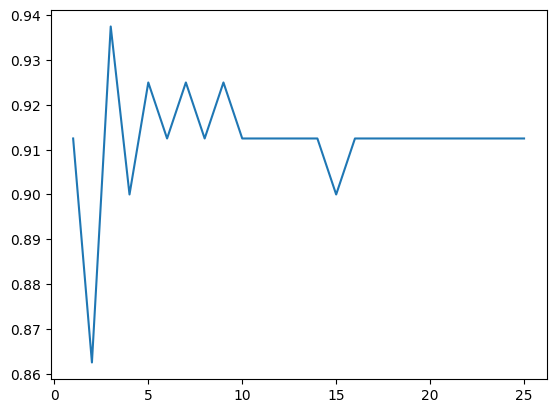

In [99]:
plt.plot(range(1,26), accuracy)

In [100]:
#creating a function for taking input from the user

def predict_output():
  age = int(input("enter your age"))
  salary = int(input("enter your salary"))
  X_new= np.array([[age],[salary]]).reshape(1,2)
  X_new = scaler.transform(X_new)
  if knn.predict(X_new)==1:
    print("you will  buy the product")
  else:
    print("you will not  buy the product")


In [102]:
predict_output()

enter your age 5
enter your salary 120
you will  buy the product
